In [28]:
import pandas as pd
import numpy as np
from PyRadioLoc.Utils.GeoUtils import GeoUtils
from matplotlib import pyplot as plt
import folium

In [2]:
ds = pd.read_csv("LocTreino_Equipe_7.csv")
ds.head()

,lat,lon,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,pontoId
0,-8.05350,-34.94862,-84.430000,-87.840000,-88.682857,-68.080,-78.435000,-69.520000,-88.683333,-90.952,-97.2550,5,2,4,7718
1,-8.05004,-34.95311,-88.258571,-95.222857,-88.390000,-92.185,-92.125833,-91.580000,-94.210000,-97.358,-96.1825,3,4,3,8803
2,-8.04802,-34.94762,-96.996429,-80.504286,-93.993571,-90.760,-97.685000,-98.701429,-109.650000,-102.064,-94.4075,3,3,6,9375
3,-8.05192,-34.94780,-91.590000,-93.840000,-89.137143,-49.770,-68.682500,-79.268571,-90.726667,-98.048,-97.6000,4,2,5,8193
4,-8.05197,-34.95227,-80.772857,-92.857143,-78.750000,-85.390,-90.067500,-93.081429,-90.976667,-93.826,-95.6050,4,4,3,8152


In [3]:
ds.shape

(1500, 15)

In [4]:
ds2 = pd.read_csv("Bts.csv")
ds2

,grupo,btsId,lat,lon,cch,azimuth,RssiId,Eirp
0,1,BTS_1_1,-8.04342,-34.952000,873,0,rssi_1_1,55.59
1,1,BTS_1_2,-8.04342,-34.952000,872,120,rssi_1_2,55.59
2,1,BTS_1_3,-8.04342,-34.952000,875,240,rssi_1_3,55.59
3,2,BTS_2_1,-8.05289,-34.944672,865,0,rssi_2_1,55.59
4,2,BTS_2_2,-8.05289,-34.944672,874,120,rssi_2_2,55.59
5,2,BTS_2_3,-8.05289,-34.944672,871,240,rssi_2_3,55.59
6,3,BTS_3_1,-8.05532,-34.957900,877,0,rssi_3_1,55.59
7,3,BTS_3_2,-8.05532,-34.957900,881,120,rssi_3_2,55.59
8,3,BTS_3_3,-8.05532,-34.957900,869,240,rssi_3_3,55.59


In [5]:
ds = ds.drop(columns=['pontoId'])

In [6]:
rssi_fitter = pd.DataFrame(data={'RSSI_1_1': [-150, 0], 'RSSI_1_2': [-150, 0], 'RSSI_1_3': [-150, 0], 'RSSI_2_1': [-150, 0], 'RSSI_2_2': [-150, 0], 'RSSI_2_3': [-150, 0], 'RSSI_3_1': [-150, 0], 'RSSI_3_2': [-150, 0], 'RSSI_3_3': [-150, 0], 'DELAY_1': [0, 8], 'DELAY_2': [0, 8], 'DELAY_3': [0, 8]})
rssi_fitter

,RSSI_1_1,RSSI_1_2,RSSI_1_3,RSSI_2_1,RSSI_2_2,RSSI_2_3,RSSI_3_1,RSSI_3_2,RSSI_3_3,DELAY_1,DELAY_2,DELAY_3
0,-150,-150,-150,-150,-150,-150,-150,-150,-150,0,0,0
1,0,0,0,0,0,0,0,0,0,8,8,8


In [7]:
MIN_LAT = min(list(ds['lat']))
MAX_LAT = max(list(ds['lat']))
MIN_LON = min(list(ds['lon']))
MAX_LON = max(list(ds['lon']))

In [8]:
lat_lon_fitter = pd.DataFrame(data={'lat': [MIN_LAT, MAX_LAT], 'lon': [MIN_LON, MAX_LON]})
lat_lon_fitter

,lat,lon
0,-8.05955,-34.95985
1,-8.04642,-34.94511


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler1 = MinMaxScaler()
scaler1.fit(rssi_fitter)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
scaler2 = MinMaxScaler()
scaler2.fit(lat_lon_fitter)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
for col in ds:
    if "rssi" in col:
        print("{} max -> {}".format(col, max(list(ds[col]))))
        print("{} min -> {}".format(col, min(list(ds[col]))))

rssi_1_1 max -> -61.38
rssi_1_1 min -> -110.21
rssi_1_2 max -> -64.82
rssi_1_2 min -> -105.43
rssi_1_3 max -> -60.64
rssi_1_3 min -> -105.69
rssi_2_1 max -> -36.96
rssi_2_1 min -> -107.01
rssi_2_2 max -> -59.17
rssi_2_2 min -> -103.85
rssi_2_3 max -> -58.86
rssi_2_3 min -> -104.54
rssi_3_1 max -> -56.06
rssi_3_1 min -> -109.65
rssi_3_2 max -> -55.87
rssi_3_2 min -> -115.63
rssi_3_3 max -> -50.1
rssi_3_3 min -> -105.13


In [13]:
for col in ds:
    if "delay" in col:
        print("{} max -> {}".format(col, max(list(ds[col]))))
        print("{} min -> {}".format(col, min(list(ds[col]))))

delay_1 max -> 8
delay_1 min -> 1
delay_2 max -> 7
delay_2 min -> 1
delay_3 max -> 7
delay_3 min -> 0


In [14]:
x = ds.iloc[:,2:].values
y = ds.iloc[:,0:2].values

x_train = x[:1250]
y_train = y[:1250]
x_test = x[1250:]
y_test = y[1250:]

In [15]:
x_train = scaler1.transform(x_train)
x_test = scaler1.transform(x_test)
y_train = scaler2.transform(y_train)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
regrss = KNeighborsRegressor()

In [18]:
regrss.fit(x_train, y_train)
y_pred = scaler2.inverse_transform(regrss.predict(x_test))

In [19]:
len(y_pred[:,0])

250

In [20]:
df = pd.DataFrame({})
df['p_lat'] = y_pred[:,0]
df['p_lon'] = y_pred[:,1]
df['o_lat'] = y_test[:,0]
df['o_lon'] = y_test[:,1]

In [21]:
df

,p_lat,p_lon,o_lat,o_lon
0,-8.050962,-34.950520,-8.05077,-34.95054
1,-8.046748,-34.945150,-8.04675,-34.94515
2,-8.053110,-34.959722,-8.05330,-34.95973
3,-8.049540,-34.954684,-8.04936,-34.95571
4,-8.055310,-34.951258,-8.05525,-34.95163
...,...,...,...,...
245,-8.047364,-34.947574,-8.04701,-34.94758
246,-8.051376,-34.950490,-8.05158,-34.94996
247,-8.052318,-34.948270,-8.05233,-34.94834
248,-8.055522,-34.953738,-8.05559,-34.95374


In [22]:
df['dist'] = df.apply(lambda x: GeoUtils.distanceInKm(x.p_lat, x.p_lon, x.o_lat, x.o_lon), axis=1)

In [23]:
erro = np.mean(df['dist'].values)

print("Max: ", df['dist'].values.max())
print("Min: ", df['dist'].values.min())
print("Erro: ", erro)

Max:  0.17663386178943105
Min:  0.0002211920723921915
Erro:  0.031644179378944225


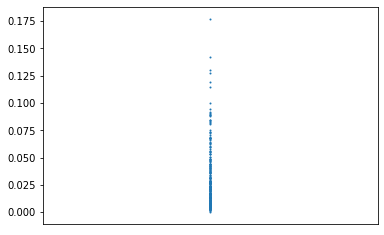

In [24]:
plt.scatter([0]*df.shape[0],df['dist'],s=1)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.show()

In [25]:
df

,p_lat,p_lon,o_lat,o_lon,dist
0,-8.050962,-34.950520,-8.05077,-34.95054,0.021349
1,-8.046748,-34.945150,-8.04675,-34.94515,0.000221
2,-8.053110,-34.959722,-8.05330,-34.95973,0.021032
3,-8.049540,-34.954684,-8.04936,-34.95571,0.114835
4,-8.055310,-34.951258,-8.05525,-34.95163,0.041538
...,...,...,...,...,...
245,-8.047364,-34.947574,-8.04701,-34.94758,0.039157
246,-8.051376,-34.950490,-8.05158,-34.94996,0.062627
247,-8.052318,-34.948270,-8.05233,-34.94834,0.007829
248,-8.055522,-34.953738,-8.05559,-34.95374,0.007524


In [31]:
positions = df[['o_lat', 'o_lon']].values
predictions = df[['p_lat', 'p_lon']].values

In [47]:
center_lat = np.mean([lat for lat in ds2['lat'].values])
center_lon = np.mean([lon for lon in ds2['lon'].values])
original_pts_map = folium.Map(location=[center_lat, center_lon],
                              zoom_start=15,
                              tiles='CartoDB positron')

In [48]:
for location in positions:
    marker = folium.CircleMarker(location=location,
                                 radius=0.5,
                                 color='blue',
                                 fill_opacity=0.1)
    marker.add_to(original_pts_map)

# Plot BTSs locations
for location in ds2[['lat', 'lon']].values:
    marker = folium.Marker(location=location, color='darkred')
    marker.add_to(original_pts_map)

# Export map
original_pts_map.save("original_pts2.html")

In [49]:
center_lat = np.mean([lat for lat in ds2['lat'].values])
center_lon = np.mean([lon for lon in ds2['lon'].values])
original_pts_map = folium.Map(location=[center_lat, center_lon],
                              zoom_start=15,
                              tiles='CartoDB positron')

In [50]:
for location in positions:
    marker = folium.CircleMarker(location=location,
                                 radius=0.5,
                                 color='blue',
                                 fill_opacity=0.1)
    marker.add_to(original_pts_map)

for location in predictions:
    marker = folium.CircleMarker(location=location,
                                 radius=0.5,
                                 color='red',
                                 fill_opacity=0.3)
    marker.add_to(original_pts_map)

# Plot BTSs locations
for location in ds2[['lat', 'lon']].values:
    marker = folium.Marker(location=location, color='darkred')
    marker.add_to(original_pts_map)

# Export map
original_pts_map.save("predictions_pts2.html")

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
regrss = RandomForestRegressor()

In [61]:
regrss.fit(x_train, y_train)
y_pred2 = scaler2.inverse_transform(regrss.predict(x_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
df2 = pd.DataFrame({})
df2['p_lat'] = y_pred2[:,0]
df2['p_lon'] = y_pred2[:,1]
df2['o_lat'] = y_test[:,0]
df2['o_lon'] = y_test[:,1]

In [63]:
df2['dist'] = df2.apply(lambda x: GeoUtils.distanceInKm(x.p_lat, x.p_lon, x.o_lat, x.o_lon), axis=1)

In [ ]:
ds2

In [64]:
erro = np.mean(df2['dist'].values)

print("Max: ", df2['dist'].values.max())
print("Min: ", df2['dist'].values.min())
print("Erro: ", erro)

Max:  0.22059940430154437
Min:  0.0006665535821524397
Erro:  0.027314665561102316


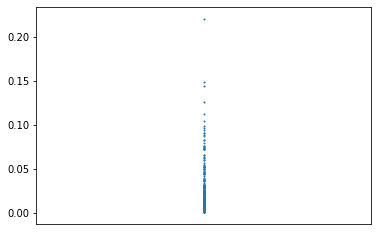

In [65]:
plt.scatter([0]*df2.shape[0],df2['dist'],s=1)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.show()

In [67]:
positions2 = df2[['o_lat', 'o_lon']].values
predictions2 = df2[['p_lat', 'p_lon']].values

In [68]:
center_lat = np.mean([lat for lat in ds2['lat'].values])
center_lon = np.mean([lon for lon in ds2['lon'].values])
original_pts_map = folium.Map(location=[center_lat, center_lon],
                              zoom_start=15,
                              tiles='CartoDB positron')

In [69]:
for location in positions2:
    marker = folium.CircleMarker(location=location,
                                 radius=0.5,
                                 color='blue',
                                 fill_opacity=0.1)
    marker.add_to(original_pts_map)

for location in predictions2:
    marker = folium.CircleMarker(location=location,
                                 radius=0.5,
                                 color='green',
                                 fill_opacity=0.3)
    marker.add_to(original_pts_map)

# Plot BTSs locations
for location in ds2[['lat', 'lon']].values:
    marker = folium.Marker(location=location, color='darkred')
    marker.add_to(original_pts_map)

# Export map
original_pts_map.save("predictions_pts2_randomforest.html")

### MLP

In [70]:
from sklearn.neural_network import MLPRegressor

In [71]:
regrss = MLPRegressor()

In [72]:
regrss.fit(x_train, y_train)
y_pred3 = scaler2.inverse_transform(regrss.predict(x_test))

In [73]:
df3 = pd.DataFrame({})
df3['p_lat'] = y_pred3[:,0]
df3['p_lon'] = y_pred3[:,1]
df3['o_lat'] = y_test[:,0]
df3['o_lon'] = y_test[:,1]

In [74]:
df3['dist'] = df3.apply(lambda x: GeoUtils.distanceInKm(x.p_lat, x.p_lon, x.o_lat, x.o_lon), axis=1)

In [81]:
df3

,p_lat,p_lon,o_lat,o_lon,dist
0,-8.051790,-34.950418,-8.05077,-34.95054,0.113557
1,-8.049720,-34.946299,-8.04675,-34.94515,0.352002
2,-8.053873,-34.959376,-8.05330,-34.95973,0.074432
3,-8.049200,-34.955258,-8.04936,-34.95571,0.052866
4,-8.055679,-34.950652,-8.05525,-34.95163,0.117815
...,...,...,...,...,...
245,-8.048603,-34.948831,-8.04701,-34.94758,0.223750
246,-8.052433,-34.950174,-8.05158,-34.94996,0.097262
247,-8.052685,-34.947325,-8.05233,-34.94834,0.118586
248,-8.055348,-34.954037,-8.05559,-34.95374,0.042299


In [75]:
erro = np.mean(df3['dist'].values)

print("Max: ", df3['dist'].values.max())
print("Min: ", df3['dist'].values.min())
print("Erro: ", erro)

Max:  0.3772112579413198
Min:  0.004815429204582123
Erro:  0.11517511077043212


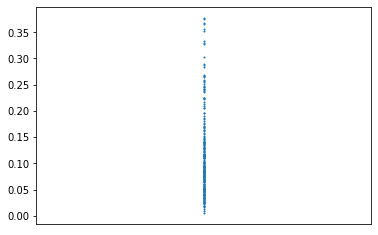

In [76]:
plt.scatter([0]*df3.shape[0],df3['dist'],s=1)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.show()

In [77]:
positions3 = df3[['o_lat', 'o_lon']].values
predictions3 = df3[['p_lat', 'p_lon']].values

In [78]:
center_lat = np.mean([lat for lat in ds2['lat'].values])
center_lon = np.mean([lon for lon in ds2['lon'].values])
original_pts_map = folium.Map(location=[center_lat, center_lon],
                              zoom_start=15,
                              tiles='CartoDB positron')

In [80]:
for location in positions3:
    marker = folium.CircleMarker(location=location,
                                 radius=0.5,
                                 color='blue',
                                 fill_opacity=0.1)
    marker.add_to(original_pts_map)

for location in predictions3:
    marker = folium.CircleMarker(location=location,
                                 radius=0.5,
                                 color='yellow',
                                 fill_opacity=0.3)
    marker.add_to(original_pts_map)

# Plot BTSs locations
for location in ds2[['lat', 'lon']].values:
    marker = folium.Marker(location=location, color='darkred')
    marker.add_to(original_pts_map)

# Export map
original_pts_map.save("predictions_pts2_mlp.html")

In [82]:
df.to_csv("knn_predicts.csv", index=False, sep=',')

In [83]:
df2.to_csv("randomforest_predicts.csv", index=False, sep=',')

In [84]:
df3.to_csv("mlp_predicts.csv", index=False, sep=',')